# Парная линейная регрессия

Содержание работы
1. Загрузить данные из тектовых файлов.
2. Создать и построить модель парной линейной регрессии с использованием метода градиентного спуска.
3. Оценить на графике качество построенной модели.
4. Построить кривые обучения.

In [548]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загружаем данные

In [549]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv')

In [550]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [551]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

In [552]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [553]:
x=x.to_frame()

In [554]:
x.shape

(20, 1)

In [555]:
y.shape

(20,)

Визуализируем данные

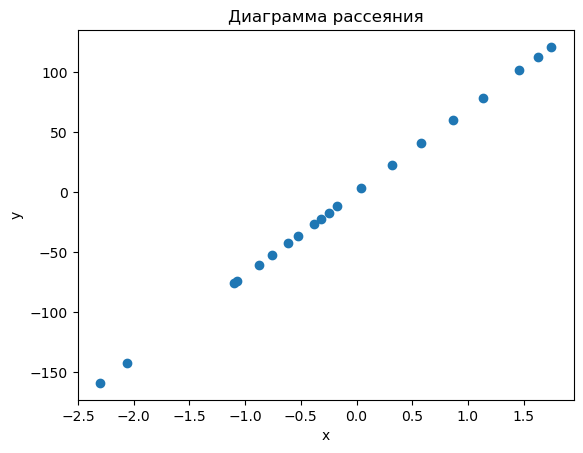

In [556]:
plt.figure()
plt.scatter(x, y)
plt.title("Диаграмма рассеяния")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Мы видим, что линейная зависимость прослеживается в данных. Значит, мы можем продолжать использовать парную линейную регрессию.

# 2. Создать и построить модель парной линейной регрессии с использованием метода градиентного спуска.

In [557]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):
        X=X.squeeze()
        Y=Y.squeeze()
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def fit_simpl(self, X, Y):  
        X=X.squeeze()
        Y=Y.squeeze()
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
    def fit(self, X, Y, alpha=1, max_steps=50000):
        X=X.squeeze()
        Y=Y.squeeze()
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if errors[len(errors)-2] - errors[len(errors)-1] < 0.000001 and _!=0:
                return steps, errors
        return steps, errors
    def draw(self,x,y):
        steps, errors = self.fit(x,y)
        
        X=np.linspace(x.min(),x.max(),len(x))
        Y=hyp.predict(X)
        
        plt.figure()
        plt.scatter(x, y)
        plt.plot(X, Y, 'r')
        plt.title("Диаграмма рассеяния с линией регрессии")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
        
        plt.figure()
        plt.plot(steps,errors,'g')
        plt.title('Кривая обучения')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

In [558]:
hyp=Model()

Выведем значение ошибки

In [559]:
J = hyp.error(x, y)
print("initial error:", J)

initial error: 2937.6446095153406


In [560]:
X=np.linspace(x.min(),x.max(),len(x))
Y=hyp.predict(X)

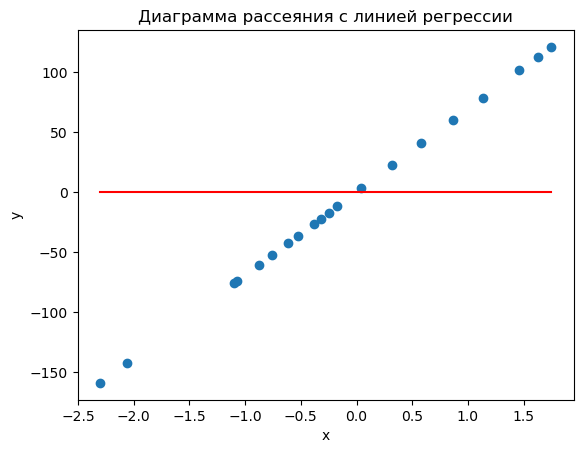

In [561]:
plt.figure()
plt.scatter(x, y)
plt.plot(X, Y, 'r')
plt.title("Диаграмма рассеяния с линией регрессии")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Реализуем градиентный спуск

In [562]:
steps, errors = hyp.fit(x,y)

In [563]:
len(errors)

10

In [564]:
hyp.b0, hyp.b1

(0.00010670107842085917, 69.18748023941718)

In [565]:
print('y=%.2f' % hyp.b0,'+ %.2f' %hyp.b1,'* x')

y=0.00 + 69.19 * x


In [566]:
Y=hyp.predict(X)

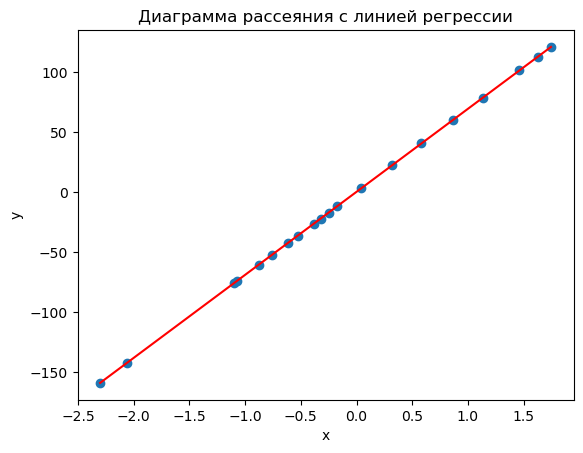

In [567]:
plt.figure()
plt.scatter(x, y)
plt.plot(X, Y, 'r')
plt.title("Диаграмма рассеяния с линией регрессии")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Ошибка после 1 итерации градиентного спуска

In [568]:
J = hyp.error(x, y)
print("1 error:", J)

1 error: 4.1772608368551725e-08


График зависимости ошибки от числа шагов

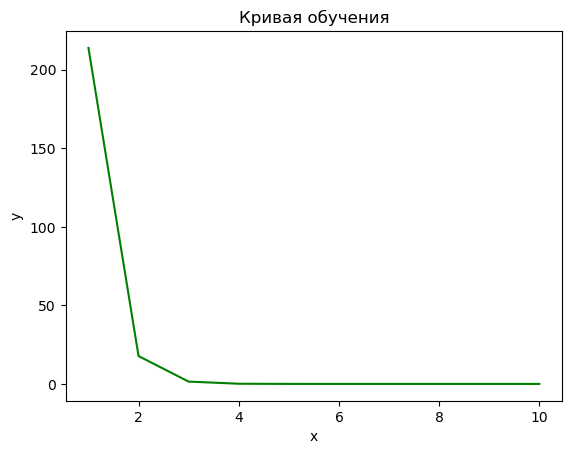

In [569]:
plt.figure()
plt.plot(steps,errors,'g')
plt.title('Кривая обучения')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Задания для самостоятельного выполнения

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [570]:
hyp.b0=100
hyp.b1=100

In [571]:
steps, errors = hyp.fit(x,y)

In [572]:
hyp.b0, hyp.b1

(-8.192130368553016e-05, 69.18788887124252)

In [573]:
Y=hyp.predict(X)

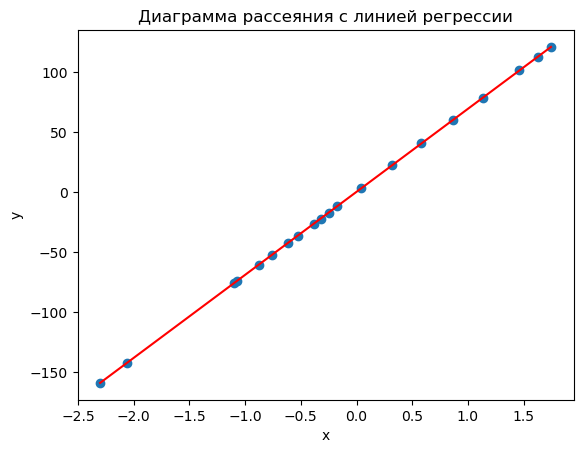

In [574]:
plt.figure()
plt.scatter(x, y)
plt.plot(X, Y, 'r')
plt.title("Диаграмма рассеяния с линией регрессии")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [575]:
J = hyp.error(x, y)
print("1 error:", J)

1 error: 2.462409037644285e-08


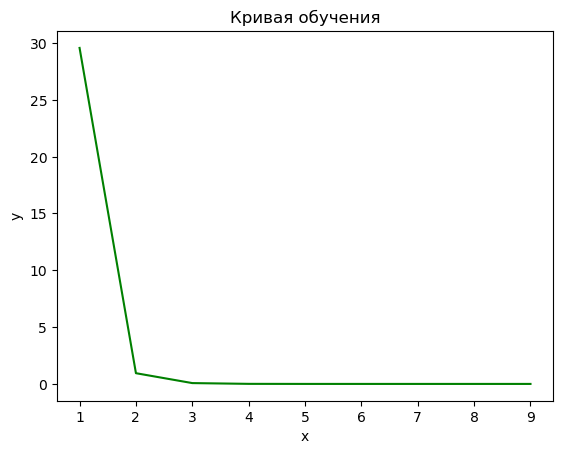

In [576]:
plt.figure()
plt.plot(steps,errors,'g')
plt.title('Кривая обучения')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [577]:
hyp.b0=100
hyp.b1=100

In [578]:
steps, errors = hyp.fit(x,y,alpha=5)

In [579]:
len(errors)

2

In [580]:
hyp.b0, hyp.b1

(1456.7376275329584, 286.6582628627609)

In [581]:
Y=hyp.predict(X)

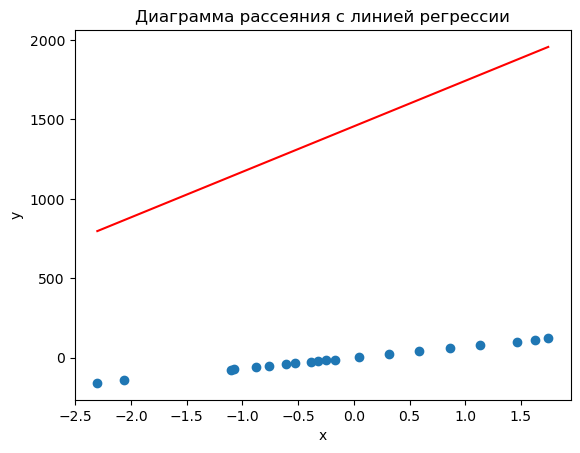

In [582]:
plt.figure()
plt.scatter(x, y)
plt.plot(X, Y, 'r')
plt.title("Диаграмма рассеяния с линией регрессии")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [583]:
J = hyp.error(x, y)
print("1 error:", J)

1 error: 1047815.6652050462


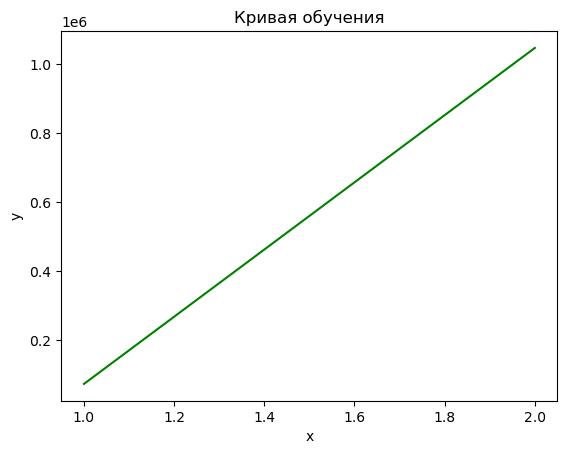

In [584]:
plt.figure()
plt.plot(steps,errors,'g')
plt.title('Кривая обучения')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [585]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):
        X=X.squeeze()
        Y=Y.squeeze()
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def fit_simpl(self, X, Y):  
        X=X.squeeze()
        Y=Y.squeeze()
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        X=X.squeeze()
        Y=Y.squeeze()
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [586]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):
        X=X.squeeze()
        Y=Y.squeeze()
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def fit_simpl(self, X, Y):  
        X=X.squeeze()
        Y=Y.squeeze()
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        X=X.squeeze()
        Y=Y.squeeze()
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if errors[len(errors)-2] - errors[len(errors)-1] < 0.000001 and _!=0:
                return steps, errors
        return steps, errors

5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [587]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):
        X=X.squeeze()
        Y=Y.squeeze()
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def fit_simpl(self, X, Y):  
        X=X.squeeze()
        Y=Y.squeeze()
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
    def fit(self, X, Y, alpha=1, max_steps=5000):
        X=X.squeeze()
        Y=Y.squeeze()
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if errors[len(errors)-1] > errors[len(errors)-2] and _!=0:
                alpha//=2
                fit(X,Y)
                return
            if errors[len(errors)-2] - errors[len(errors)-1] < 0.000001 and _!=0:
                return steps, errors
        return steps, errors

7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [588]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):
        X=X.squeeze()
        Y=Y.squeeze()
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def fit_simpl(self, X, Y):  
        X=X.squeeze()
        Y=Y.squeeze()
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
    def fit(self, X, Y, alpha=1, max_steps=5000):
        X=X.squeeze()
        Y=Y.squeeze()
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if errors[len(errors)-1] > errors[len(errors)-2] and _!=0:
                alpha//=2
                self.fit(X,Y)
                return
            if errors[len(errors)-2] - errors[len(errors)-1] < 0.000001 and _!=0:
                return steps, errors
        return steps, errors
    def draw(self,x,y):
        steps, errors = self.fit(x,y)

        X=np.linspace(x.min(),x.max(),len(x))
        Y=hyp.predict(X)
        
        plt.figure()
        plt.scatter(x, y)
        plt.plot(X, Y, 'r')
        plt.title("Диаграмма рассеяния с линией регрессии")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
        
        plt.figure()
        plt.plot(steps,errors,'g')
        plt.title('Кривая обучения')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

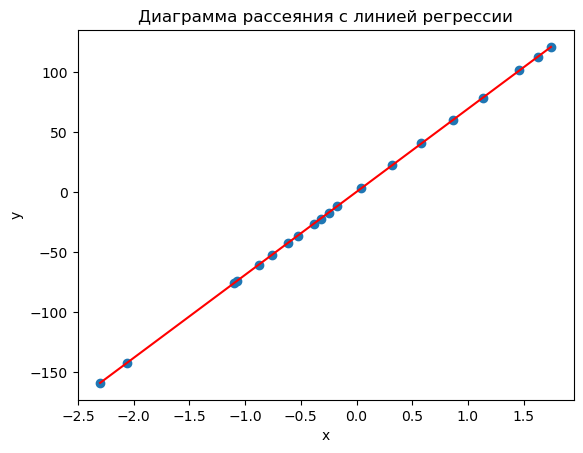

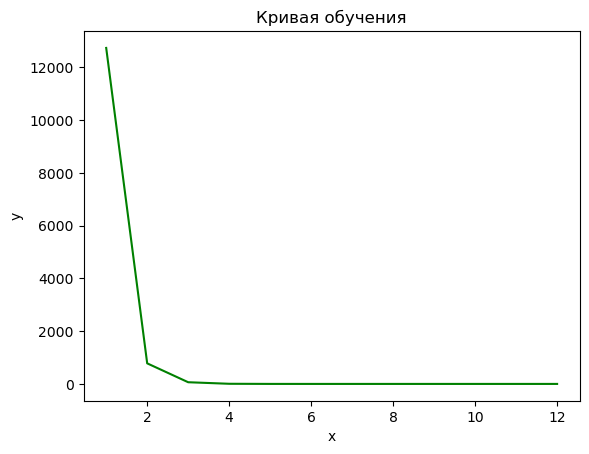

In [589]:
hyp.draw(x,y)